# Graded Challenge 1

_Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada konsep Basic Python, Numpy, serta Data Preparation with Pandas._

Dibuat Oleh: [Ivan Yapputra Yappi](https://github.com/Vayxius)

Hactiv8 Data Science: Batch 13

---

## Dataset Description

Dataset ini menggunakan dataset pokemon yang dapat dilihat dan diunduh di [Kaggle](https://www.kaggle.com/abcsds/pokemon).
```
This dataset includes 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.

The feature of this data is:
```
| Feature | Description |
| --- | --- |
| # | ID for each pokemon |
| Name | Name of each pokemon |
| Type 1 | Each pokemon has a type, this determines weakness/resistance to attacks |
| Type 2 | Some pokemon are dual type and have 2 |
| Total | sum of all stats that come after this, a general guide to how strong a pokemon is |
| HP | hit points, or health, defines how much damage a pokemon can withstand before fainting |
| Attack | the base modifier for normal attacks (eg. Scratch, Punch) |
| Defense | the base damage resistance against normal attacks |
| SP Atk | special attack, the base modifier for special attacks (e.g. fire blast, bubble beam) |
| SP Def | the base damage resistance against special attacks |
| Speed | determines which pokemon attacks first each round |

## Description

### Objective

Tujuan dari project Graded Challenge ini, untuk mencari:
- Berapa banyak pokemon normal dan pokemon legendary disetiap generasi?
- Berapa rata-rata total stats pokemon normal dan pokemon legendary disetiap generasi?
- Berapa selisih atau perbandingan total stats pokemon (normal) yang memiliki 1 kemampuan, dengan pokemon (normal) yang memiliki 2 kemampuan disetiap generasi? (berdasarkan total stats tertinggi)
- Berapa selisih atau perbandingan total stats pokemon (legendary) yang memiliki 1 kemampuan, dengan pokemon (legendary) yang memiliki 2 kemampuan disetiap generasi? (berdasarkan total stats tertinggi)
- Siapa yang akan bertahan jika pokemon (normal) yang memiliki `total stats` tertinggi bertarung dengan pokemon (legendary) yang memiliki `total stats` tertinggi? 

## Working Area

### Import Library

Import semua library yang akan digunakan dalam project Graded Challenge 1.

In [242]:
import pandas as pd # Import library

Dalam project Graded Challenge 1 ini, library yang digunakan hanya Pandas saja.

### Data Loading

Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan gambaran data.

Memuat semua data yang berada di dalam file `Pokemon.csv`.

In [243]:
# Load data from pokemon.csv

data_pokemon = pd.read_csv('Pokemon.csv')

Membuat variable baru untuk dataframe pokemon dengan nama `df_pokemon`.

### Data Overview

In [244]:
data_pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


Melihat 10 data awal dari dataframe `data_pokemon`.

In [245]:
data_pokemon.tail(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
790,714,Noibat,Flying,Dragon,245,40,30,35,45,40,55,6,False
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False
792,716,Xerneas,Fairy,NaN,680,126,131,95,131,98,99,6,True
793,717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,6,True
794,718,Zygarde50% Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


Melihat 10 data terakhir dari dataframe `data_pokemon`.

In [246]:
data_pokemon.shape # Returns tuple of shape (Rows, columns) of dataframe data_pokemon

(800, 13)

Melihat bentuk dari `data_pokemon`, dataset ini terdiri dari 800 baris, dan 13 kolom.

In [247]:
data_pokemon.info() # Return informasi dari dataframe data_pokemon

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Pada dataset ini dapat dilihat bahwa dataframe `data_pokemon` terdiri dari 13 kolom, dengan 3 tipe data yaitu:
- 1 kolom bertipe data boolean.
- 3 kolom bertipe data object.
- 9 kolom bertipe data integer.

Dari dataset ini juga terdapat missing value pada kolom `Type 2` yang hanya menampilkan 414 data dari 800 baris.

In [248]:
data_pokemon.describe().T # Summary Statistic

,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


Menampilkan ringkasan statistik dari dataframe `data_pokemon` dengan tipe data numeric, hasil data diatas menampilkan:
- rata-rata.
- standar deviasi.
- nilai minimum.
- kuartil.
- nilai maksimum.

Berdasarkan Data Overview diatas, diketahui bahwa:
- Missing value pada kolom `Type  2`.
- Rentang Generation dari Generation 1 sampai 6.

## Data Cleaning

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut.

### Rename Column

Agar memudahkan pemanggilan kolom pada saat explorasi data, maka akan dilakukan perubahan nama label pada kolom dataframe `data_pokemon` terlebih dahulu.

In [249]:
data_pokemon.head(1)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


Menampilkan dataframe `data_pokemon` sebelum perubahan kolom terjadi.

In [250]:
data_pokemon.rename(columns={"Name": "name",
                             "Type 1": "type_1",
                             "Type 2": "type_2",
                             "Total": "total",
                             "HP": "hp", 
                             "Attack": "attack",
                             "Defense": "defense",
                             "Sp. Atk": "sp_atk",
                             "Sp. Def": "sp_def",
                             "Speed": "speed",
                             "Generation": "generation",
                             "Legendary": "legendary"}, inplace= True)

Melakukan perubahan nama label terhadap kolom yang ada di dalam dataframe `data_pokemon`.

In [251]:
data_pokemon.head(1)

,#,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


Penamaan label di setiap kolom dataframe `data_pokemon` sudah terubah.

### Drop Column

Melakukan penghapusan kolom yang tidak terpakai, pada project `Graded Challenge` ini kolom `#` tidak akan digunakan, maka akan dihilangkan.

In [252]:
data_pokemon.drop(columns='#',inplace= True) # menghilangkan kolom dengan label #
data_pokemon.head(1)

,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


Pada dataframe `data_pokemon`. Kolom dengan label `#` sudah terhapus.

### Missing Value

Melakukan pemeriksaan terhadap dataframe `data_pokemon` berapa banyak missing value yang ada.

In [253]:
data_pokemon.isna().sum() # melakukan pengecekkan berapa banyak value yang kosong (NaN).

name            0
type_1          0
type_2        386
total           0
hp              0
attack          0
defense         0
sp_atk          0
sp_def          0
speed           0
generation      0
legendary       0
dtype: int64

Terdapat 386 missing value pada kolom `type_2`

In [254]:
data_pokemon.fillna('None',inplace=True)

Melakukan perubahan value terhadap missing value yang berada di kolom `type_2`, dan mengganti missing value tersebut dengan keterangan `None`.

In [255]:
data_pokemon.isna().sum() # melakukan pengecekkan berapa banyak value yang kosong (NaN).

name          0
type_1        0
type_2        0
total         0
hp            0
attack        0
defense       0
sp_atk        0
sp_def        0
speed         0
generation    0
legendary     0
dtype: int64

Sudah tidak terdapat missing value lagi di dalam dataframe `data_pokemon`.

### Create Column

Menambahkan kolom `ability` untuk menampilkan jumlah elemen yang dimiliki oleh pokemon.

In [256]:
ability = []
for i in range(0,len(data_pokemon)):
    if data_pokemon.iloc[i,2] == 'None':
        tipe = 'one'
    else:
        tipe = 'two'
    ability.append(tipe)
data_pokemon['ability'] = ability

kolom `ability` sudah ditambahkan Pada dataframe `data_pokemon`, value pada kolom `ability` hanya berisi `one` dan `two`. 

## Data Exploration

Bagian ini berisi explorasi data pada dataset `pokemon` dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [257]:
data_pokemon.head(10)

,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary,ability
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,two
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,two
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,two
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,two
4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False,one
5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False,one
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,two
7,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,two
8,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,two
9,Squirtle,Water,None,314,44,48,65,50,64,43,1,False,one


Melihat 10 data teratas dari dataframe `data_pokemon`

### Query

In [258]:
data_pokemon[
             (data_pokemon['generation']==1) & # Query mencari pokemon generasi ke-1
             (data_pokemon['legendary']==False) & # Query mencari pokemon non-legendary
             (data_pokemon['type_2']!='None') # Query mencari pokemon yang hanya memiliki 2 elemen
             ][['name','type_1','type_2','total','generation','legendary','ability']].head() # membatasi display kolom

,name,type_1,type_2,total,generation,legendary,ability
0,Bulbasaur,Grass,Poison,318,1,False,two
1,Ivysaur,Grass,Poison,405,1,False,two
2,Venusaur,Grass,Poison,525,1,False,two
3,VenusaurMega Venusaur,Grass,Poison,625,1,False,two
6,Charizard,Fire,Flying,534,1,False,two


Query di atas menampilkan pokemon (normal) generasi pertama yang memiliki 2 elemen.

In [259]:
data_pokemon[
             (data_pokemon['generation']==1) & # Query mencari pokemon generasi ke-1
             (data_pokemon['legendary']==True) & # Query mencari pokemon legendary
             (data_pokemon['type_2']=='None') # Query mencari pokemon yang hanya memiliki 1 elemen
             ][['name','type_1','type_2','generation','legendary','ability']].head(5)

,name,type_1,type_2,generation,legendary,ability
162,Mewtwo,Psychic,None,1,True,one
164,MewtwoMega Mewtwo Y,Psychic,None,1,True,one


Query di atas menampilkan pokemon (legendary) generasi pertama yang hanya memiliki 1 elemen.

In [260]:
best_gen1_normal = data_pokemon[(data_pokemon['generation']==1) & (data_pokemon['legendary']==False)].max() # Mencari normal pokemon dengan stats paling tinggi
# Membandingkan pokemon (legendary) dengan pokemon (normal) yang memiliki total stats tertinggi.
data_pokemon[
             (data_pokemon['generation']==1) & # Mencari pokemon generasi ke-1
             (data_pokemon['legendary']==True) & # Mencari pokemon legendary
             (data_pokemon['total'] < best_gen1_normal.total) # Mencari total stats pokemon legendary yang lebih rendah dari total stats pokemon normal
             ][['name','type_1','type_2','total','generation','legendary']].head(5) # Membatasi display kolom

,name,type_1,type_2,total,generation,legendary
156,Articuno,Ice,Flying,580,1,True
157,Zapdos,Electric,Flying,580,1,True
158,Moltres,Fire,Flying,580,1,True


Query di atas menampilkan pokemon (legendary) generasi pertama dengan total stats lebih rendah dari pokemon (normal) generasi pertama.

### Grouping and Aggregating

In [261]:
data_pokemon.groupby(by=['generation','legendary']).size() # menampilkan informasi berdasarkan kelompok kolom generation dan legendary

generation  legendary
1           False        160
            True           6
2           False        101
            True           5
3           False        142
            True          18
4           False        108
            True          13
5           False        150
            True          15
6           False         74
            True           8
dtype: int64

#### Berapa banyak pokemon normal dan pokemon legendary disetiap generasinya?

Pada pengelompokkan data di atas, terdiri dari:

| Generation | Normal Pokemon | Legendary Pokemon |
| --- | --- | --- |
| 1 | 160 | 6 |
| 2 | 101 | 5 |
| 3 | 142 | 18 |
| 4 | 108 | 13 |
| 5 | 150 | 15 |
| 6 | 74 | 8 |

##### Visualisation

<AxesSubplot:title={'center':'Normal Pokemon & Legendary Pokemon In Every Generation'}, ylabel='generation,legendary'>

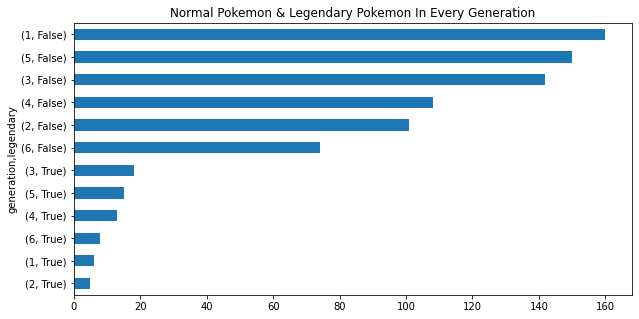

In [262]:
data_pokemon.groupby(by=['generation','legendary']).size().sort_values().plot(figsize=(10,5), kind='barh', title='Normal Pokemon & Legendary Pokemon In Every Generation')

Dari visualisasi data di atas diketahui bawha normal pokemon generasi pertama, generasi kelima, dan generasi ketiga yang paling sering muncul. 

In [263]:
data_pokemon.groupby(by=['generation','legendary'])[['total']].mean()

total
generation legendary            
1          False      417.943750
           True       663.333333
2          False      408.297030
           True       620.000000
3          False      409.267606
           True       648.888889
4          False      437.879630
           True       634.615385
5          False      416.620000
           True       618.666667
6          False      414.094595
           True       642.500000

#### Berapa rata-rata `total stats` pokemon normal dan pokemon legendary disetiap generasinya?

Rata-rata `total stats` pokemon pada dataframe `data_pokemon`, yaitu:

| Generation | Mean Pokemon Normal | Mean Pokemon Legendary |
| --- | --- | --- |
| 1 | 418 pts. | 663 pts. |
| 2 | 408 pts. | 620 pts. |
| 3 | 409 pts. | 649 pts. |
| 4 | 438 pts. | 635 pts. |
| 5 | 417 pts. | 619 pts. |
| 6 | 414 pts. | 642 pts. |

##### Visualisation

<AxesSubplot:title={'center':'Mean Normal & Legendary Pokemon In Every Generation'}, xlabel='generation,legendary'>

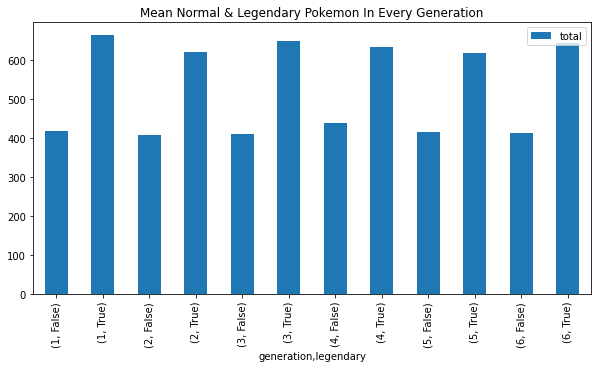

In [264]:
data_pokemon.groupby(by=['generation','legendary'])[['total']].mean().plot(figsize=(10,5), kind='bar', title='Mean Normal & Legendary Pokemon In Every Generation')

Dari visualisasi data di atas diketahui bawha pokemon legendary pada generasi pertama memiliki rata-rata total stats paling tinggi.

In [265]:
data_pokemon.groupby(by=['generation','ability','legendary']).size()

generation  ability  legendary
1           one      False        86
                     True          2
            two      False        74
                     True          4
2           one      False        48
                     True          3
            two      False        53
                     True          2
3           one      False        68
                     True         10
            two      False        74
                     True          8
4           one      False        47
                     True          7
            two      False        61
                     True          6
5           one      False        81
                     True          2
            two      False        69
                     True         13
6           one      False        31
                     True          1
            two      False        43
                     True          7
dtype: int64

Menampilkan data yang sudah dikelompokkan berdasarkan generasi, ability, dan legendary:

| Generation | elements | Normal Pokemon | Legendary Pokemon |
| --- | --- | --- | --- |
| 1 | 1 | 86 | 2 |
|  | 2 | 74 | 4 |
| 2 | 1 | 48 | 3 |
|  | 2 | 53 | 2 |
| 3 | 1 | 68 | 10 |
|  | 2 | 74 | 8 |
| 4 | 1 | 47 | 7 |
|  | 2 | 61 | 6 |
| 5 | 1 | 81 | 2 |
|  | 2 | 69 | 13 |
| 6 | 1 | 31 | 1 |
|  | 2 | 43 | 7 |

#### Berapa selisih/perbandingan `total stats` pokemon (normal) yang memiliki 1 kemampuan, dengan pokemon (normal) yang memiliki 2 kemampuan disetiap generasinya? (berdasarkan total stats tertinggi)

Pokemon normal yang memiliki 1 dan 2 elemen dengan `total stats` tertinggi di setiap generasinnya adalah:

In [266]:
normal_pokemon = data_pokemon[(data_pokemon['legendary']==False)].groupby(by=['generation','ability','legendary'])[['name','total']].max()
normal_pokemon.head(15)

name  total
generation ability legendary                  
1          one     False        Weezing    630
           two     False          Zubat    640
2          one     False      Wobbuffet    540
           two     False          Yanma    700
3          one     False      Zigzagoon    670
           two     False        Wingull    700
4          one     False        Turtwig    600
           two     False        Yanmega    700
5          one     False          Zorua    540
           two     False       Zweilous    600
6          one     False        Sylveon    600
           two     False       Vivillon    535

##### Visualisation

<AxesSubplot:title={'center':'Normal Pokemon Stats'}, ylabel='Group'>

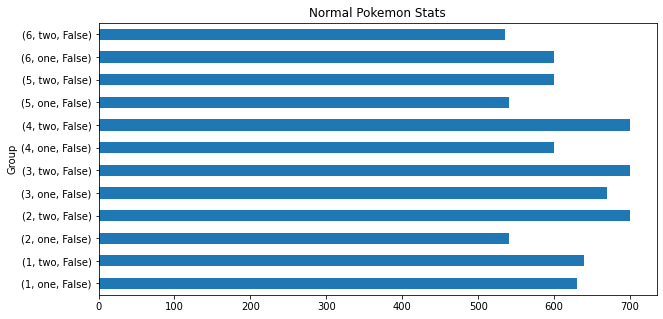

In [267]:
normal_pokemon = data_pokemon[(data_pokemon['legendary']==False)].groupby(by=['generation','ability','legendary']).max()
normal_pokemon['total'].plot(kind='barh', xlabel='Group', title='Normal Pokemon Stats', figsize=(10,5))

Diketahui terdapat 3 pokemon yang memiliki total stats yang sama, yaitu:
- pokemon normal pada generasi kedua yang memiliki 2 elemen.
- pokemon normal pada generasi ketiga yang memiliki 2 elemen.
- pokemon normal pada generasi keempat yang memiliki 2 elemen.

#### Berapa selisih/perbandingan `total stats` pokemon (legendary) yang memiliki 1 kemampuan, dengan pokemon (legendary) yang memiliki 2 kemampuan disetiap generasinya? (berdasarkan total stats tertinggi)

Pokemon legendary yang memiliki 1 dan 2 elemen dengan `total stats` tertinggi di setiap generasinnya adalah:

In [268]:
legendary_pokemon = data_pokemon[(data_pokemon['legendary']==True)].groupby(by=['generation','ability','legendary'])[['name','total']].max()
legendary_pokemon.head(15)

name  total
generation ability legendary                              
1          one     True         MewtwoMega Mewtwo Y    780
           two     True                      Zapdos    780
2          one     True                     Suicune    580
           two     True                       Lugia    680
3          one     True                   Registeel    770
           two     True       RayquazaMega Rayquaza    780
4          one     True                        Uxie    720
           two     True            ShayminSky Forme    680
5          one     True       TornadusTherian Forme    580
           two     True                      Zekrom    700
6          one     True                     Xerneas    680
           two     True            Zygarde50% Forme    700

<AxesSubplot:title={'center':'Legendary Pokemon Stats'}, xlabel='Group'>

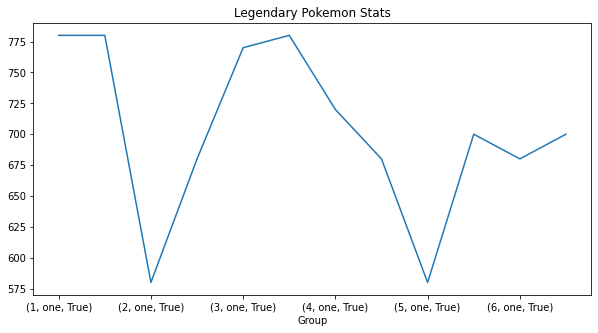

In [269]:
legendary_pokemon = data_pokemon[(data_pokemon['legendary']==True)].groupby(by=['generation','ability','legendary']).max()
legendary_pokemon['total'].plot(kind='line', xlabel='Group', title='Legendary Pokemon Stats', figsize=(10,5))

Diketahui terdapat 2 pokemon legendary yang memiliki total stats terendah yang sama, yaitu:
- pokemon legendary pada generasi kedua yang memiliki 1 elemen.
- pokemon legendary pada generasi kelima yang memiliki 1 elemen.

### Siapa yang akan bertahan jika pokemon (normal) yang memiliki `total stats` tertinggi bertarung dengan pokemon (legendary) yang memiliki `total stats` tertinggi?

In [270]:
pokemon_normal = data_pokemon[(data_pokemon['legendary']==False)].max() # Mencari pokemon normal dengan total stats tertinggi
pokemon_normal # menammpilkan informasi pokemon

name          Zweilous
type_1           Water
type_2           Water
total              700
hp                 255
attack             185
defense            230
sp_atk             175
sp_def             230
speed              160
generation           6
legendary        False
ability            two
dtype: object

Pokemon normal yang memiliki total stats tertinggi adalah Zweilous dengan total stats 700 points

In [271]:
pokemon_legendary = data_pokemon[(data_pokemon['legendary']==True)].max() # Mencari pokemon legendary dengan total stats tertinggi
pokemon_legendary # menammpilkan informasi pokemon

name          Zygarde50% Forme
type_1                   Water
type_2                   Water
total                      780
hp                         150
attack                     190
defense                    200
sp_atk                     194
sp_def                     200
speed                      180
generation                   6
legendary                 True
ability                    two
dtype: object

Pokemon legendary yang memiliki total stats tertinggi adalah Zygarde50% Forme dengan total stats 780 points

Membuat fungsi simulasi battle sederhana berdasarkan formula sederhana, dengan beberapa kondisi yaitu:
- jika speed pokemon A lebih kecil dari pokemon B, maka pokemon B terlebih dahulu yang menyerang
- damage yang diterima jika spesial attack tidak aktif adalah : attack_pokemon_B / defense_pokemon_A
- damage yang diterima jika spesial attack aktif adalah : sp_atk_pokemon_B / sp_defense_pokemon_A

In [272]:
def simulasi():
    round = 1 # Menentukan jumlah ronde sampai salah satu pokemon pingsan.
    special = 0 # spesial attack pokemon normal
    special_legend = 0 # spesial attack pokemon legend
    while True: # Looping
        print(f"Rounde: {round}") # output jumlah ronde
        if pokemon_normal.speed < pokemon_legendary.speed: # kondisi jika speed pokemon normal lebih rendah dari speed pokemon legendary
            if pokemon_normal.hp != 0 and pokemon_normal.hp > 0 and special_legend == 5: # kondisi jika Hp pokemon normal lebih besar dari 0 dan spesial attack terpenuhi
                pokemon_normal.hp -= pokemon_legendary.sp_atk/pokemon_normal.sp_def # Hp pokemon normal akan dikurangi dari hasil damage yang diberikan
                print(f"{pokemon_normal['name']} Hp: {pokemon_normal.hp}") # output sisa Hp yang dimiliki
                special_legend = 0 # Reset special attack
            elif pokemon_normal.hp != 0 and pokemon_normal.hp > 0: # kondisi jika Hp pokemon normal lebih besar dari 0
                pokemon_normal.hp -= pokemon_legendary.attack/pokemon_normal.defense # Hp pokemon normal akan dikurangi dari hasil damage yang diberikan
                print(f"{pokemon_normal['name']} Hp: {pokemon_normal.hp}") # output sisa Hp yang dimiliki
            else: # Kondisi jika Hp pokemon normal sudah kurang dari 0
                print(f"{pokemon_normal['name']} Fainted...") # output pokemon normal telah pingsan
                break # looping dihentikan
            if pokemon_legendary.hp != 0 and pokemon_legendary.hp > 0 and special == 5: # kondisi jika Hp pokemon legendary lebih besar dari 0 dan spesial attack terpenuhi
                pokemon_legendary.hp -= pokemon_normal.sp_atk/pokemon_legendary.sp_def # Hp pokemon legendary akan dikurangi dari hasil damage yang diberikan
                print(f"{pokemon_legendary['name']} Hp: {pokemon_legendary.hp}") # output sisa Hp yang dimiliki
                special = 0 # Reset special attack
            elif pokemon_legendary.hp != 0 and pokemon_legendary.hp > 0: # kondisi jika Hp pokemon legendary lebih besar dari 0
                pokemon_legendary.hp -= pokemon_normal.attack/pokemon_legendary.defense # Hp pokemon legendary akan dikurangi dari hasil damage yang diberikan
                print(f"{pokemon_legendary['name']} Hp: {pokemon_legendary.hp}") # output sisa Hp yang dimiliki
            else: # Kondisi jika Hp pokemon legendary sudah kurang dari 0
                print(f"{pokemon_legendary['name']} Fainted...") # output pokemon legendary telah pingsan
                break # looping dihentikan
        else:  # kondisi jika speed pokemon legendary lebih rendah dari speed pokemon normal
            if pokemon_legendary.hp != 0 and pokemon_legendary.hp > 0 and special == 5: # kondisi jika Hp pokemon legendary lebih besar dari 0 dan spesial attack terpenuhi
                pokemon_legendary.hp -= pokemon_normal.sp_atk/pokemon_legendary.sp_def # Hp pokemon legendary akan dikurangi dari hasil damage yang diberikan
                print(f"{pokemon_legendary['name']} Hp: {pokemon_legendary.hp}") # output sisa Hp yang dimiliki
                special = 0 # Reset special attack
            elif pokemon_legendary.hp != 0 and pokemon_legendary.hp > 0: # kondisi jika Hp pokemon legendary lebih besar dari 0
                pokemon_legendary.hp -= pokemon_normal.attack/pokemon_legendary.defense # Hp pokemon legendary akan dikurangi dari hasil damage yang diberikan
                print(f"{pokemon_legendary['name']} Hp: {pokemon_legendary.hp}") # output sisa Hp yang dimiliki
            else: # Kondisi jika Hp pokemon legendary sudah kurang dari 0
                print(f"{pokemon_legendary['name']} Fainted...") # output pokemon legendary telah pingsan
                break # looping dihentikan
            if pokemon_normal.hp != 0 and pokemon_normal.hp > 0 and special_legend == 5: # kondisi jika Hp pokemon normal lebih besar dari 0 dan spesial attack terpenuhi
                pokemon_normal.hp -= pokemon_legendary.sp_atk/pokemon_normal.sp_def # Hp pokemon normal akan dikurangi dari hasil damage yang diberikan
                print(f"{pokemon_normal['name']} Hp: {pokemon_normal.hp}") # output sisa Hp yang dimiliki
                special_legend = 0 # Reset special attack
            elif pokemon_normal.hp != 0 and pokemon_normal.hp > 0: # kondisi jika Hp pokemon normal lebih besar dari 0
                pokemon_normal.hp -= pokemon_legendary.attack/pokemon_normal.defense # Hp pokemon normal akan dikurangi dari hasil damage yang diberikan
                print(f"{pokemon_normal['name']} Hp: {pokemon_normal.hp}") # output sisa Hp yang dimiliki
            else: # Kondisi jika Hp pokemon normal sudah kurang dari 0
                print(f"{pokemon_normal['name']} Fainted...") # output pokemon normal telah pingsan
                break # looping dihentikan
        special_legend += 1 # Menambah isi spesial attack
        special += 1 # Menambah isi spesial attack
        round+=1 # Ronde bertambah 1


simulasi() # memanggil function simulasi


Rounde: 1
Zweilous Hp: 254.17391304347825
Zygarde50% Forme Hp: 149.075
Rounde: 2
Zweilous Hp: 253.3478260869565
Zygarde50% Forme Hp: 148.14999999999998
Rounde: 3
Zweilous Hp: 252.52173913043475
Zygarde50% Forme Hp: 147.22499999999997
Rounde: 4
Zweilous Hp: 251.695652173913
Zygarde50% Forme Hp: 146.29999999999995
Rounde: 5
Zweilous Hp: 250.86956521739125
Zygarde50% Forme Hp: 145.37499999999994
Rounde: 6
Zweilous Hp: 250.02608695652168
Zygarde50% Forme Hp: 144.49999999999994
Rounde: 7
Zweilous Hp: 249.19999999999993
Zygarde50% Forme Hp: 143.57499999999993
Rounde: 8
Zweilous Hp: 248.37391304347818
Zygarde50% Forme Hp: 142.64999999999992
Rounde: 9
Zweilous Hp: 247.54782608695643
Zygarde50% Forme Hp: 141.7249999999999
Rounde: 10
Zweilous Hp: 246.72173913043468
Zygarde50% Forme Hp: 140.7999999999999
Rounde: 11
Zweilous Hp: 245.8782608695651
Zygarde50% Forme Hp: 139.9249999999999
Rounde: 12
Zweilous Hp: 245.05217391304336
Zygarde50% Forme Hp: 138.9999999999999
Rounde: 13
Zweilous Hp: 244.2260

Hasil dari program di atas adalah `Zygarde50% Forme` telah pingsan setelah bertarung selama 165 ronde, sedangkan `Zweilous` masih bertahan dengan Hp points: 118 pts.

Mencoba pertandingan kedua menggunakan pokemon normal dengan stats terendah dan pokemon legendary dengan stats terendah.

In [273]:
pokemon_normal = data_pokemon[(data_pokemon['legendary']==False)].min() # Mencari pokemon normal dengan total stats terendah
pokemon_normal # Menampilkan informasi data pokemon

name          Abomasnow
type_1              Bug
type_2              Bug
total               180
hp                    1
attack                5
defense               5
sp_atk               10
sp_def               20
speed                 5
generation            1
legendary         False
ability             one
dtype: object

In [276]:
pokemon_legendary = data_pokemon[(data_pokemon['legendary']==True)].min() # Mencari pokemon legendary dengan total stats terendah
pokemon_legendary # Menampilkan informasi data pokemon

name          Arceus
type_1          Dark
type_2          Dark
total            580
hp                50
attack            50
defense           20
sp_atk            50
sp_def            20
speed             50
generation         1
legendary       True
ability          one
dtype: object

In [275]:
simulasi()

Rounde: 1
Abomasnow Hp: -9.0
Arceus Hp: 49.75
Rounde: 2
Abomasnow Fainted...


Hasil dari pertandingan di atas adalah `Abomasnow` telah pingsan setelah bertarung 2 ronde, sedangkan `Arceus` masih bertahan dengan sisa Hp points: 49.75 pts.

## Conclusions, Assumptions, Overall Analysis

Kesimpulan dari data exploration di atas: